<a href="https://colab.research.google.com/github/paulosalvatore/Ocean_CienciaDados_24_02_2021/blob/main/TSE_Ocean_CienciaDados_24_02_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

sigla_uf = 'AL'

nome_arquivo = f'receitas_candidatos_2018_{sigla_uf}.csv'
url_arquivo = f'https://raw.githubusercontent.com/paulosalvatore/Ocean_CienciaDados_24_02_2021/main/receitas_candidatos/{nome_arquivo}'

df = pd.read_csv(url_arquivo, sep=';', encoding='latin-1', decimal=',')

In [2]:
df

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,DT_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,SG_UF,SG_UE,NM_UE,NR_CNPJ_PRESTADOR_CONTA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NR_CPF_VICE_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,CD_FONTE_RECEITA,DS_FONTE_RECEITA,CD_ORIGEM_RECEITA,DS_ORIGEM_RECEITA,CD_NATUREZA_RECEITA,DS_NATUREZA_RECEITA,CD_ESPECIE_RECEITA,DS_ESPECIE_RECEITA,CD_CNAE_DOADOR,DS_CNAE_DOADOR,NR_CPF_CNPJ_DOADOR,NM_DOADOR,NM_DOADOR_RFB,CD_ESFERA_PARTIDARIA_DOADOR,DS_ESFERA_PARTIDARIA_DOADOR,SG_UF_DOADOR,CD_MUNICIPIO_DOADOR,NM_MUNICIPIO_DOADOR,SQ_CANDIDATO_DOADOR,NR_CANDIDATO_DOADOR,CD_CARGO_CANDIDATO_DOADOR,DS_CARGO_CANDIDATO_DOADOR,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA
0,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,18/02/2020,422888416,AL,AL,ALAGOAS,31224633000107,7,Deputado Estadual,20000619777,50192,MARIA DE FATIMA RODRIGUES SOUZA,40846830434,-1,50,PSOL,Partido Socialismo e Liberdade,1,Outros Recursos,10010100,Recursos próprios,1,Financeiro,4,Depósito em espécie,-1,#NULO#,40846830434,MARIA DE FATIMA RODRIGUES SOUZA,MARIA DE FATIMA RODRIGUES SOUZA,#NULO#,#NULO#,AL,-1,#NULO#,20000619777,50192,7,Deputado Estadual,50,PSOL,Partido Socialismo e Liberdade,#NULO#,40846830434,12533236,08/10/2018,#NULO#,46.20
1,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,18/02/2020,422888416,AL,AL,ALAGOAS,31224633000107,7,Deputado Estadual,20000619777,50192,MARIA DE FATIMA RODRIGUES SOUZA,40846830434,-1,50,PSOL,Partido Socialismo e Liberdade,2,Fundo Especial,10020000,Recursos de partido político,0,Estimável,2,Estimado,94928,Atividades de organizações políticas,9639805000154,Direção Estadual/Distrital,PARTIDO SOCIALISMO E LIBERDADE ALAGOAS - AL - ...,F,Federal (Estadual/Distrital),AL,-1,#NULO#,-1,-1,-1,#NULO#,50,PSOL,Partido Socialismo e Liberdade,501920700000AL000002E,#NULO#,12533234,15/08/2018,SERVIÇOS CONTABEIS,468.08
2,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,18/02/2020,422888416,AL,AL,ALAGOAS,31224633000107,7,Deputado Estadual,20000619777,50192,MARIA DE FATIMA RODRIGUES SOUZA,40846830434,-1,50,PSOL,Partido Socialismo e Liberdade,0,Fundo Partidario,10020000,Recursos de partido político,0,Estimável,2,Estimado,94928,Atividades de organizações políticas,9639805000154,Direção Estadual/Distrital,PARTIDO SOCIALISMO E LIBERDADE ALAGOAS - AL - ...,F,Federal (Estadual/Distrital),AL,-1,#NULO#,-1,-1,-1,#NULO#,50,PSOL,Partido Socialismo e Liberdade,501920700000AL000003E,#NULO#,12533235,15/08/2018,SERVIÇOS ADVOCATICIOS,468.08
3,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,18/02/2020,422888416,AL,AL,ALAGOAS,31224633000107,7,Deputado Estadual,20000619777,50192,MARIA DE FATIMA RODRIGUES SOUZA,40846830434,-1,50,PSOL,Partido Socialismo e Liberdade,2,Fundo Especial,10020000,Recursos de partido político,1,Financeiro,0,Cheque,94928,Atividades de organizações políticas,9639805000154,Direção Estadual/Distrital,PARTIDO SOCIALISMO E LIBERDADE ALAGOAS - AL - ...,F,Federal (Estadual/Distrital),AL,-1,#NULO#,-1,-1,-1,#NULO#,50,PSOL,Partido Socialismo e Liberdade,501920700000AL000001E,850018,12533233,12/09/2018,#NULO#,3864.35
4,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,07/02/2019,422733975,AL,AL,ALAGOAS,31217422000147,7,Deputado Estadual,20000616952,54002,LENILDA COSTA DOS SANTOS,101438400,-1,54,PPL,Partido Pátria Livre,1,Outros Recursos,10020000,Recursos de partido político,0,Estimável,2,Estimado,94928,Atividades de organizações políticas,15624065000185,Direção Estadual/Distrital,PARTIDO PATRIA LIVRE - ALAGOAS - AL - ESTADUAL,F,Federal (Estadual/Distrital),AL,-1,#NULO#,-1,-1,-1,#NULO#,54,PPL,Partido Pátria Livre,540020700000AL000006E,#NULO#,1242721

In [3]:
colunas = ['SQ_CANDIDATO', 'NM_CANDIDATO', 'VR_RECEITA']
df_filtrado = df[colunas]

In [4]:
len(df_filtrado.SQ_CANDIDATO.unique())

376

In [5]:
len(df_filtrado.NM_CANDIDATO.unique())

376

In [6]:
group = df_filtrado.groupby(['SQ_CANDIDATO', 'NM_CANDIDATO'])

group.SQ_CANDIDATO.count()

SQ_CANDIDATO  NM_CANDIDATO                                  
20000600622   ADELMO JOSÉ SILVA DE ASSIS                         4
20000600623   MARIA TAVARES FERRO                               37
20000600624   TIBÉRIO DA SILVA ROCHA JÚNIOR                      3
20000602675   FLAVIA MARIA LUIZ DE MENDONÇA ALBUQUERQUE REIS     6
20000602676   HELOISA HELENA LIMA DE MORAES CARVALHO             5
                                                                ..
20000629335   THIAGO DOS ANJOS PEREIRA E SILVA                   3
20000629456   FRANCISCO JOSÉ DA SILVA                           15
20000629503   MOACYR LOPES DE ANDRADE FILHO                      4
20000630007   JOSÉ PINTO DE LUNA                                 4
20000630049   MARCOS ANTONIO MACEDO HOLANDA                      4
Name: SQ_CANDIDATO, Length: 376, dtype: int64

In [7]:
group_sum = group.VR_RECEITA.sum()

group_sum

SQ_CANDIDATO  NM_CANDIDATO                                  
20000600622   ADELMO JOSÉ SILVA DE ASSIS                          2529.01
20000600623   MARIA TAVARES FERRO                                48714.45
20000600624   TIBÉRIO DA SILVA ROCHA JÚNIOR                       7299.16
20000602675   FLAVIA MARIA LUIZ DE MENDONÇA ALBUQUERQUE REIS      5871.00
20000602676   HELOISA HELENA LIMA DE MORAES CARVALHO            737000.00
                                                                  ...    
20000629335   THIAGO DOS ANJOS PEREIRA E SILVA                    5606.00
20000629456   FRANCISCO JOSÉ DA SILVA                            39347.45
20000629503   MOACYR LOPES DE ANDRADE FILHO                      67531.94
20000630007   JOSÉ PINTO DE LUNA                                110400.00
20000630049   MARCOS ANTONIO MACEDO HOLANDA                      31260.00
Name: VR_RECEITA, Length: 376, dtype: float64

In [8]:
target = group_sum.nlargest(10)

target

SQ_CANDIDATO  NM_CANDIDATO                        
20000621740   MAURÍCIO QUINTELLA MALTA LESSA          2996680.12
20000621738   JOSÉ RENAN VASCONCELOS CALHEIROS        2573114.22
20000616688   BENEDITO DE LIRA                        2200806.62
20000616686   RODRIGO SANTOS CUNHA                    1878652.57
20000616797   ARTHUR CESAR PEREIRA DE LIRA            1741793.16
20000621935   SERGIO TOLEDO DE ALBUQUERQUE            1458222.68
20000616803   JOÃO HENRIQUE HOLANDA CALDAS            1395400.00
20000616809   PEDRO TORRES BRANDAO VILELA             1358975.09
20000621947   NIVALDO FERREIRA DE ALBUQUERQUE NETO    1282622.50
20000621941   MARX BELTRÃO LIMA SIQUEIRA              1073621.94
Name: VR_RECEITA, dtype: float64

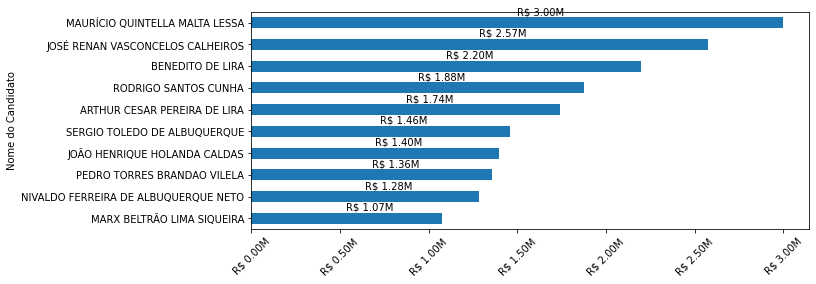

In [40]:
def formatar_valor(valor):
  return f'R$ {valor / 1000000:.2f}M'


import matplotlib.pyplot as plt

target_cleared = target.reset_index('SQ_CANDIDATO', drop=True).sort_values(ascending=True)

target_formatado = target_cleared.map(formatar_valor)

fig = plt.figure(figsize=(10, 4))
graph = target_cleared.plot.barh(figure=fig)

graph.set_ylabel('Nome do Candidato')

locations, _ = plt.xticks()

labels = []

for i, location in enumerate(locations):
  labels.append(formatar_valor(location))

graph.set_xticklabels(labels, rotation=45)

x_offset = 0
y_offset = 0.1

for index, rectangle in enumerate(graph.patches):
  box = rectangle.get_bbox()

  vr_receita = target_formatado.values[index]
  
  graph.annotate(vr_receita, ((box.x0 + box.x1) / 2 + x_offset, box.y1 + y_offset))

plt.show()